# Practice Questions for Titanic Dataset

## 1. **Data Preprocessing:**
   - **Question:** Write a Python function to calculate the percentage of missing values for each column in the dataset. Use the function to identify columns with missing values in the Titanic dataset and display their percentages. Visualize the missing data percentages using a **bar plot**.
   - **Hint:** Use the `isnull()` method combined with `sum()` to count missing values for each column. Divide the missing values by the total number of rows to calculate percentages. For visualization, use Matplotlib or Seaborn to create a bar plot.

Missing Value Percentages:
 Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64


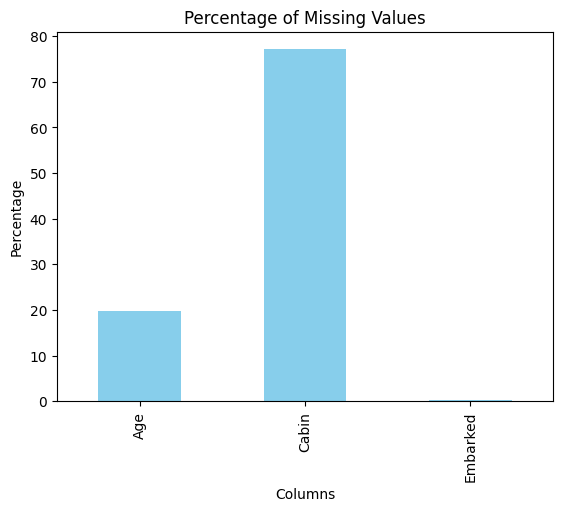

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate missing value percentages
def missing_percentage(df):
    missing = df.isnull().sum() / len(df) * 100
    return missing[missing > 0]

# Load Titanic dataset
df = pd.read_csv("titanic.csv")  # Replace with your dataset path

# Calculate and visualize missing data
missing = missing_percentage(df)
print("Missing Value Percentages:\n", missing)

# Plot the missing values
missing.plot(kind='bar', color='skyblue')
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.show()

## 2. **Feature Creation:**
   - **Question:** Create a new column **Age_Category** by categorizing passengers into three groups: **Child** (0-12), **Teen** (13-19), **Adult** (20+). Calculate the survival rate for each group and compare the results.
   - **Hint:** Use the `pd.cut()` method to create bins for age categories. Group the data by the new column using `groupby()` and calculate the mean survival rate for each group.

In [10]:
# Create Age_Category column
def age_category(age):
    if age <= 12:
        return "Child"
    elif age <= 19:
        return "Teen"
    else:
        return "Adult"

df['Age_Category'] = df['Age'].apply(age_category)

# Calculate survival rate for each category
survival_rate = df.groupby('Age_Category')['Survived'].mean()
print("Survival Rates by Age Category:\n", survival_rate)

Survival Rates by Age Category:
 Age_Category
Adult    0.361761
Child    0.579710
Teen     0.410526
Name: Survived, dtype: float64


## 3. **Family Impact on Survival:**
   - **Question:** Investigate the impact of family size on survival. Create a new column **Large_Family** (True if **Family_Size** > 3, False otherwise). Calculate and visualize the survival rate for passengers with large families versus those without using a **bar plot**.
   - **Hint:** Family size can be calculated as the sum of `SibSp` and `Parch` plus one (self). Use a conditional statement (`> 3`) to create the new column. Use `groupby()` to find the survival rates and visualize the results with a bar plot.

Survival Rates by Family Size:
 Large_Family
False    0.388750
True     0.340659
Name: Survived, dtype: float64


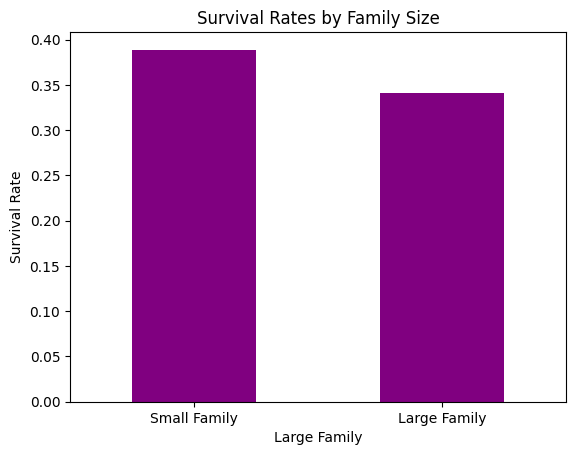

In [11]:
# Create Family_Size column
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1

# Create Large_Family column
df['Large_Family'] = df['Family_Size'] > 3

# Calculate survival rates for large and small families
family_survival = df.groupby('Large_Family')['Survived'].mean()
print("Survival Rates by Family Size:\n", family_survival)

# Bar plot visualization
family_survival.plot(kind='bar', color='purple')
plt.title("Survival Rates by Family Size")
plt.ylabel("Survival Rate")
plt.xlabel("Large Family")
plt.xticks([0, 1], ['Small Family', 'Large Family'], rotation=0)
plt.show()

## 4. **Passenger Class and Fare Analysis:**
   - **Question:** Compare the distribution of **Fare** across the different **Passenger_Class** categories using a **box plot**. What can you conclude about the distribution of ticket prices for each class? Are there any outliers?
   - **Hint:** Use Seaborn's `boxplot()` function with `Pclass` on the x-axis and `Fare` on the y-axis. Look for the spread of values and points outside the whiskers to identify outliers.

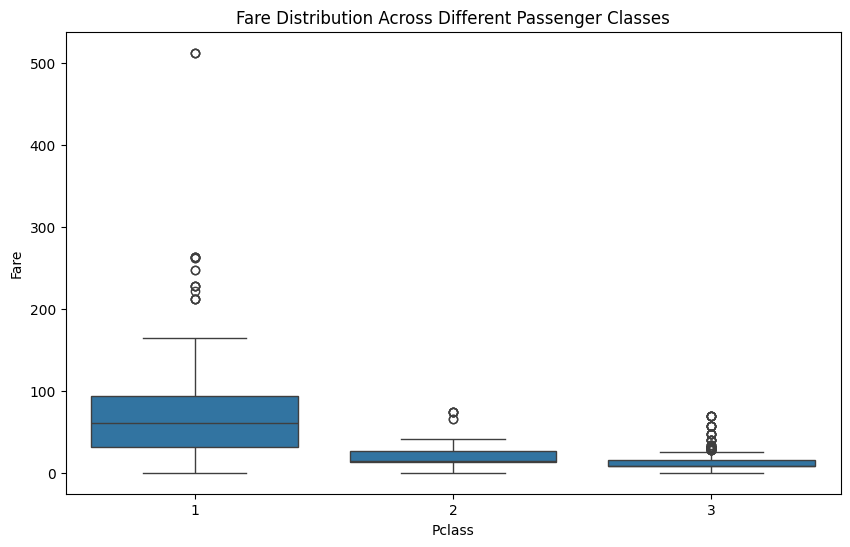

In [16]:
# Compare Fare distribution across different Passenger Class categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution Across Different Passenger Classes')
plt.show()

## 5. **Embarked Location Analysis:**
   - **Question:** Analyze the survival rates based on the **Embarked** column (Cherbourg, Queenstown, and Southampton). Create a **bar plot** to visualize the survival rate for passengers who boarded at each of the three locations. Which embarkation point had the highest survival rate?
   - **Hint:** Use `groupby()` on the Embarked column and calculate the mean survival rate. Use Matplotlib or Seaborn to create a bar plot showing survival rates.

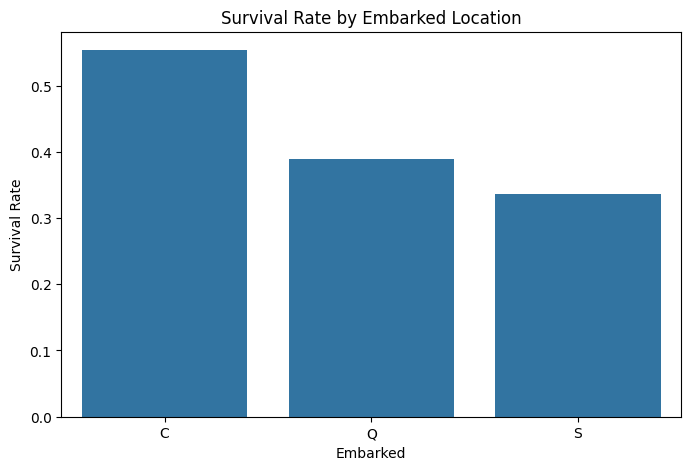

In [17]:
# Analyze survival rates based on Embarked location
embarked_survival_rate = df.groupby('Embarked')['Survived'].mean()

# Visualize the survival rate for each Embarked location
plt.figure(figsize=(8, 5))
sns.barplot(x=embarked_survival_rate.index, y=embarked_survival_rate.values)
plt.title('Survival Rate by Embarked Location')
plt.ylabel('Survival Rate')
plt.show()

## 6. **Passenger Cabin Analysis:**
   - **Question:** Investigate the **Cabin** column to check for missing or irregular data. Create a new column **Has_Cabin** where 1 indicates that a passenger has a cabin, and 0 indicates they do not. Calculate the survival rate for passengers with and without cabins. Visualize the results using a **bar plot**.
   - **Hint:** Use the `notnull()` method on the Cabin column to check if a passenger has a cabin. Convert the Boolean values to integers for the new column. Use `groupby()` to calculate survival rates and a bar plot for visualization.

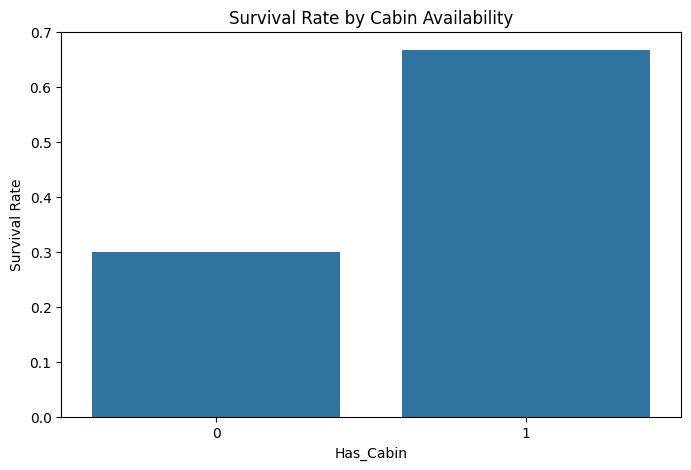

In [22]:
# Create Has_Cabin column: Check if the 'Cabin' column has missing values (NaN), 
# and create a new column where 1 means the passenger has a cabin, 0 means no cabin
df['Has_Cabin'] = df['Cabin'].notnull().astype(int)

# Calculate survival rate for passengers with and without cabins:
# Group the data by the 'Has_Cabin' column (0 or 1) and calculate the mean of the 'Survived' column
# The mean will give the survival rate for each group
cabin_survival_rate = df.groupby('Has_Cabin')['Survived'].mean()

# Visualize the survival rate for passengers with and without cabins
plt.figure(figsize=(8, 5))
sns.barplot(x=cabin_survival_rate.index, y=cabin_survival_rate.values)
plt.title('Survival Rate by Cabin Availability')
plt.ylabel('Survival Rate')
plt.show()

## Additional Practice Question: Wine Quality Dataset - Basic Data Exploration

**Question:**
- Load the **Wine Quality Dataset** from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine+quality) or from a CSV file.
- Perform the following tasks:
  1. Display the first 5 rows of the dataset.
  2. Check if there are any missing values in the dataset.
  3. Calculate and print the median of the **alcohol** and **pH** columns.
  4. Create a **box plot** to show the distribution of the **fixed acidity**.
  5. Create a **pair plot** to visualize the relationships between **citric acid**, **residual sugar**, and **density**.


First 5 rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8   

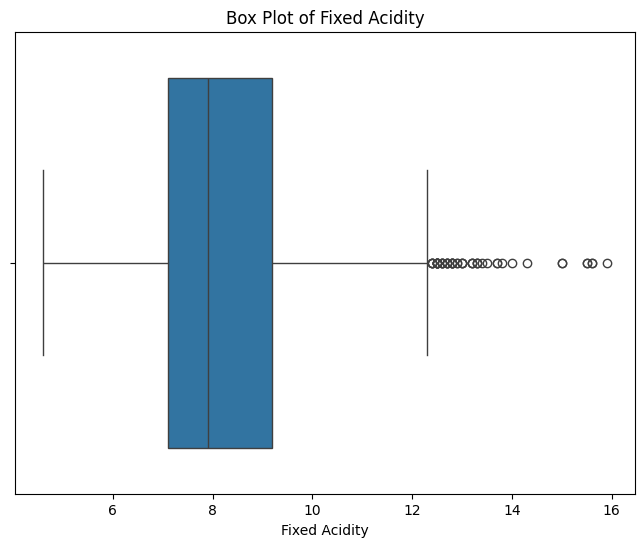

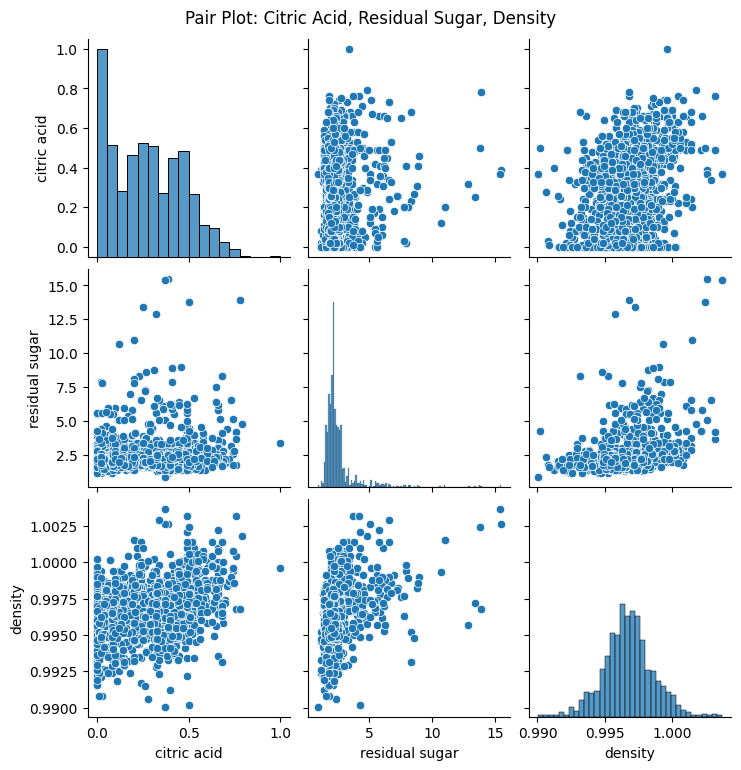

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the Wine Quality dataset
# If you have a local CSV, you can load it using pd.read_csv() like this:
# df = pd.read_csv("winequality-red.csv")  # For red wine dataset

df = pd.read_csv("winequality-red.csv", sep=";")  # The dataset uses ';' as separator

# 2. Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# 3. Check if there are any missing values in the dataset
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# 4. Calculate and print the median of the 'alcohol' and 'pH' columns
median_alcohol = df['alcohol'].median()
median_ph = df['pH'].median()

print(f"\nMedian of 'alcohol': {median_alcohol}")
print(f"Median of 'pH': {median_ph}")

# 5. Create a box plot to show the distribution of 'fixed acidity'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['fixed acidity'])
plt.title("Box Plot of Fixed Acidity")
plt.xlabel('Fixed Acidity')
plt.show()

# 6. Create a pair plot to visualize the relationships between 'citric acid', 'residual sugar', and 'density'
sns.pairplot(df[['citric acid', 'residual sugar', 'density']])
plt.suptitle("Pair Plot: Citric Acid, Residual Sugar, Density", y=1.02)
plt.show()
